**ESSAYER D'AUTRES CLASSIFICATEURS**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

from ift6758.pipeline import ExperimentPipeline, DEFAULT_TRANSFORMATIONS
from ift6758.pipeline.plots import plot_all

In [3]:
# classificateurs
classifiers = {
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Linear SVC': LinearSVC(),
    'SGD': SGDClassifier(),
    # excellent avec plus d'itérations, mais trop lent
    #'Multi-layer Perceptron': MLPClassifier(max_iter=10, early_stopping=True),
}

In [4]:
# données
df = ExperimentPipeline.get_data('../data/tabular', transformations=DEFAULT_TRANSFORMATIONS)

# caractéristiques sélectionnées à l'étape précédente
features = ['shot_distance', 'shot_angle', 'dist_prev_event', 'time_lapsed_prev_event_in_seconds', 'game_secs']

fetching dataframes from ../data/tabular
applying mirror_coordinates
applying append_shot_angle
applying append_shot_distance
applying replace_nan_by_0
applying append_game_secs
applying append_time_lapse_prev
applying append_dist_prev
applying append_rebound
applying append_angle_change
applying append_speed
applying replace_nan_by_0_2
done with preprocessing


In [5]:
X = df[features]
y = df[['goal']]

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.squeeze().ravel()
y_test  = y_test.squeeze().ravel()

In [7]:
for name, model in classifiers.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Acc', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('F1 ', f1_score(y_test, y_pred))
    if name != 'Linear SVC' and name != 'SGD':
        print("AUC", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

k-Nearest Neighbors
Acc 0.8950738338277937
[[106231   1726]
 [ 10794    571]]
F1  0.08358951837212705
AUC 0.6072700288627814
Decision Tree
Acc 0.8305677075476442
[[96979 10978]
 [ 9239  2126]]
F1  0.17377089378397156
AUC 0.5427152667687455
Random Forest
Acc 0.9024404552387657
[[107287    670]
 [ 10971    394]]
F1  0.06340011263979402
AUC 0.6962312661832358
AdaBoost
Acc 0.9044099160255443
[[107778    179]
 [ 11227    138]]
F1  0.023626091422701594
AUC 0.7324837774841844
Naive Bayes
Acc 0.9033288077638658
[[107758    199]
 [ 11336     29]]
F1  0.00500301906322781
AUC 0.7120732949266463
QDA
Acc 0.9033120463954677
[[107756    201]
 [ 11336     29]]
F1  0.0050021561017680035
AUC 0.7115373562010466
Linear SVC


/mnt/c/Users/valmi dufour-lussier/Documents/MILA/datasci/tpenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acc 0.5613298469687066
[[62377 45580]
 [ 6763  4602]]
F1  0.1495442507352105
SGD
Acc 0.9021219892392015
[[107553    404]
 [ 11275     90]]
F1  0.015178345560333923


**OPTIMISER LES HYPERPARAMÈTRES POUR ADAPTATIVE BOOSTING**

In [8]:
pipeline = ExperimentPipeline(
    tabular_dir='../data/tabular',
    feature_columns=features,
    target_column='goal',
    pipeline_steps=[
        ('adaboost', AdaBoostClassifier()),
    ],
    dataset_transformations=DEFAULT_TRANSFORMATIONS,
    parameter_grid=[{
        'adaboost__base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
        'adaboost__n_estimators': [25, 50, 75],
        'adaboost__learning_rate': [0.1, 1, 10 ],
        
    }],
    metric='roc_auc',
    enable_comet=False
)

In [9]:
pipeline.run()

fetching dataframes from ../data/tabular
applying mirror_coordinates
applying append_shot_angle
applying append_shot_distance
applying replace_nan_by_0
applying append_game_secs
applying append_time_lapse_prev
applying append_dist_prev
applying append_rebound
applying append_angle_change
applying append_speed
applying replace_nan_by_0_2
done with preprocessing
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=1), adaboost__learning_rate=0.1, adaboost__n_estimators=25;, score=0.719 total time=   4.2s
[CV 2/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=1), adaboost__learning_rate=0.1, adaboost__n_estimators=25;, score=0.717 total time=   4.5s
[CV 3/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=1), adaboost__learning_rate=0.1, adaboost__n_estimators=25;, score=0.713 total time=   5.5s
[CV 4/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=1), adaboost__l

[CV 4/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=2), adaboost__learning_rate=0.1, adaboost__n_estimators=25;, score=0.732 total time=   7.7s
[CV 5/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=2), adaboost__learning_rate=0.1, adaboost__n_estimators=25;, score=0.731 total time=   9.2s
[CV 1/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=2), adaboost__learning_rate=0.1, adaboost__n_estimators=50;, score=0.740 total time=  16.0s
[CV 2/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=2), adaboost__learning_rate=0.1, adaboost__n_estimators=50;, score=0.737 total time=  15.4s
[CV 3/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=2), adaboost__learning_rate=0.1, adaboost__n_estimators=50;, score=0.732 total time=  16.1s
[CV 4/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=2), adaboost__learning_rate=0.1, adaboost__n_estimators=50;, score=0.738 total time=  19.6s
[CV 5/5] END adaboost_

[CV 5/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=3), adaboost__learning_rate=0.1, adaboost__n_estimators=50;, score=0.740 total time=  24.2s
[CV 1/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=3), adaboost__learning_rate=0.1, adaboost__n_estimators=75;, score=0.747 total time=  36.8s
[CV 2/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=3), adaboost__learning_rate=0.1, adaboost__n_estimators=75;, score=0.743 total time=  32.2s
[CV 3/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=3), adaboost__learning_rate=0.1, adaboost__n_estimators=75;, score=0.739 total time=  31.5s
[CV 4/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=3), adaboost__learning_rate=0.1, adaboost__n_estimators=75;, score=0.743 total time=  30.4s
[CV 5/5] END adaboost__base_estimator=DecisionTreeClassifier(max_depth=3), adaboost__learning_rate=0.1, adaboost__n_estimators=75;, score=0.740 total time=  31.1s
[CV 1/5] END adaboost_

In [21]:
pipeline.grid.best_params_

{'adaboost__base_estimator': DecisionTreeClassifier(max_depth=3),
 'adaboost__learning_rate': 0.1,
 'adaboost__n_estimators': 75}

**DÉFINIR UNE MEILLEURE FONCTION DE PARTITIONNEMENT DES DONNÉES**

In [23]:
def train_test_split_alternating(X, y, factor=5):
    print(X)
    X['mod'] = X['game_id'].mod(factor)
    X_test  = X.loc[X['mod']==0]
    X_train = X.loc[X['mod']!=0]
    y_test  = y.loc[X['mod']==0]
    y_train = y.loc[X['mod']!=0]
    return (X_train, X_test, y_train, y_test)
    

In [24]:
if 'game_id' not in features:
    features.append('game_id')
X = df[features]
X_train, X_test, y_train, y_test = train_test_split_alternating(X, y)


        shot_distance  shot_angle  dist_prev_event  \
0           13.000000   67.380135       138.924440   
1           13.341664   12.994617        36.715120   
2           76.157731   60.068488       102.318131   
3           57.974132   75.004921        45.880279   
4           61.717096   63.019769        63.348244   
...               ...         ...              ...   
477281      40.311289   43.994914       139.645981   
477282      10.049876   84.289407         0.000000   
477283      30.463092   66.801409        12.806248   
477284      17.000000   90.000000         5.385165   
477285      28.017851   87.954592        22.472205   

        time_lapsed_prev_event_in_seconds  game_secs  game_id  
0                                       0         71        0  
1                                       0        173        0  
2                                      18        241        0  
3                                      19        286        0  
4                              

/tmp/ipykernel_384/1034537978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mod'] = X['game_id'].mod(factor)


In [25]:
y_train = y_train.squeeze().ravel()
y_test  = y_test.squeeze().ravel()

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=75)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Acc', accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), sep='\n')
print('F1 ', f1_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Acc
0.9042731111761508
[[86453    43]
 [ 9115    57]]
F1  0.012295081967213115
AUC 0.7402746776408891


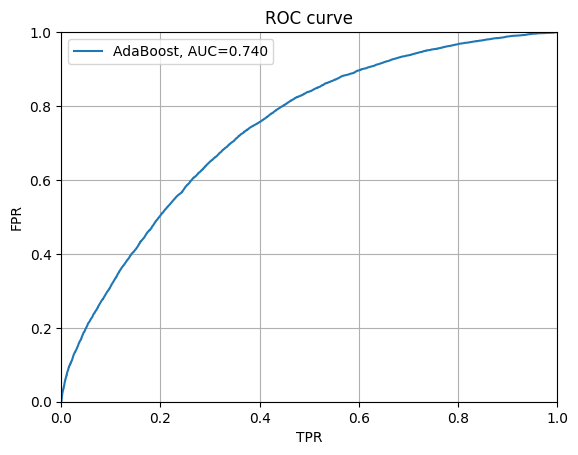

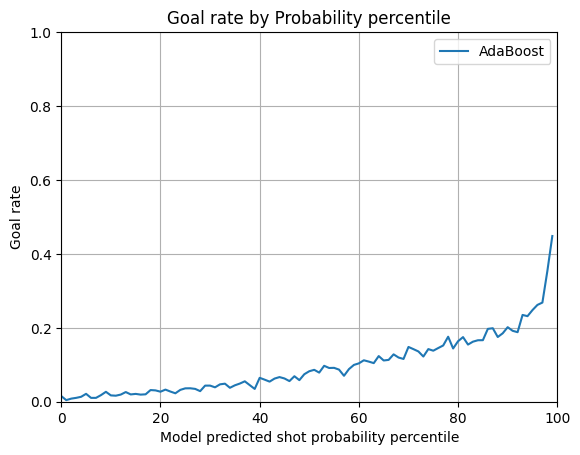

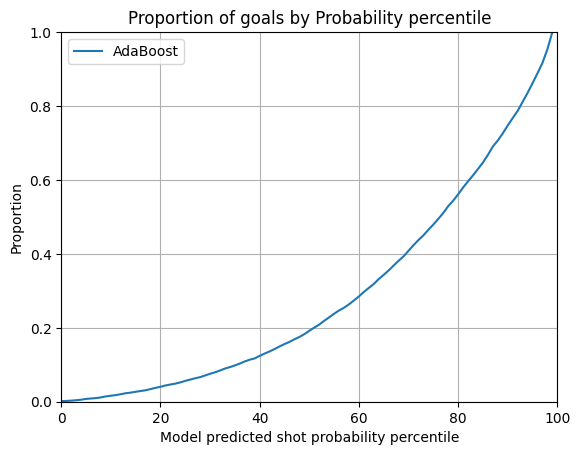

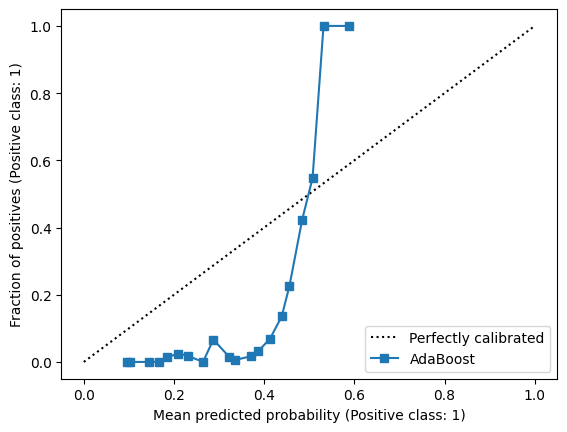

In [27]:
plot_all([y_test], [model.predict_proba(X_test)[:,1]], ['AdaBoost'])